In [ ]:
# Install required packages for visualization
!pip install matplotlib networkx plotly

In [6]:
from neo4j import GraphDatabase

In [18]:
driver = GraphDatabase.driver("bolt://neo4j:7687", auth=("neo4j", "password"))

In [22]:
# Query Neo4j and collect results
with driver.session(database="neo4j") as session:
    # Get all nodes and relationships
    result = session.run("MATCH p=()-[]->() RETURN p LIMIT 50")
    
    # Collect the data
    paths = []
    for record in result:
        paths.append(record['p'])
    
    print(f"Retrieved {len(paths)} paths from Neo4j")
    
    # Store for later use
    graph_data = paths

Retrieved 50 paths from Neo4j


In [23]:
# Display information about the graph data
print(f"Graph data contains {len(graph_data)} paths")

if graph_data:
    sample_path = graph_data[0]
    print(f"\nSample path:")
    print(f"  Nodes: {len(sample_path.nodes)}")
    print(f"  Relationships: {len(sample_path.relationships)}")
    
    # Show node details
    if sample_path.nodes:
        first_node = sample_path.nodes[0]
        print(f"\nSample node properties:")
        for key, value in first_node.items():
            print(f"  {key}: {value}")
            
    # Show relationship details
    if sample_path.relationships:
        first_rel = sample_path.relationships[0]
        print(f"\nSample relationship:")
        print(f"  Type: {first_rel.type}")
        print(f"  Properties: {dict(first_rel)}")

Graph data contains 50 paths

Sample path:
  Nodes: 2
  Relationships: 1

Sample node properties:
  informalCommunity: 0
  formalCommunity: 116
  hierarchyLevel: 3
  x: 600
  name: Bridon
  y: 508.8579621897625
  id: Bridon

Sample relationship:
  Type: REPORTS_TO
  Properties: {}


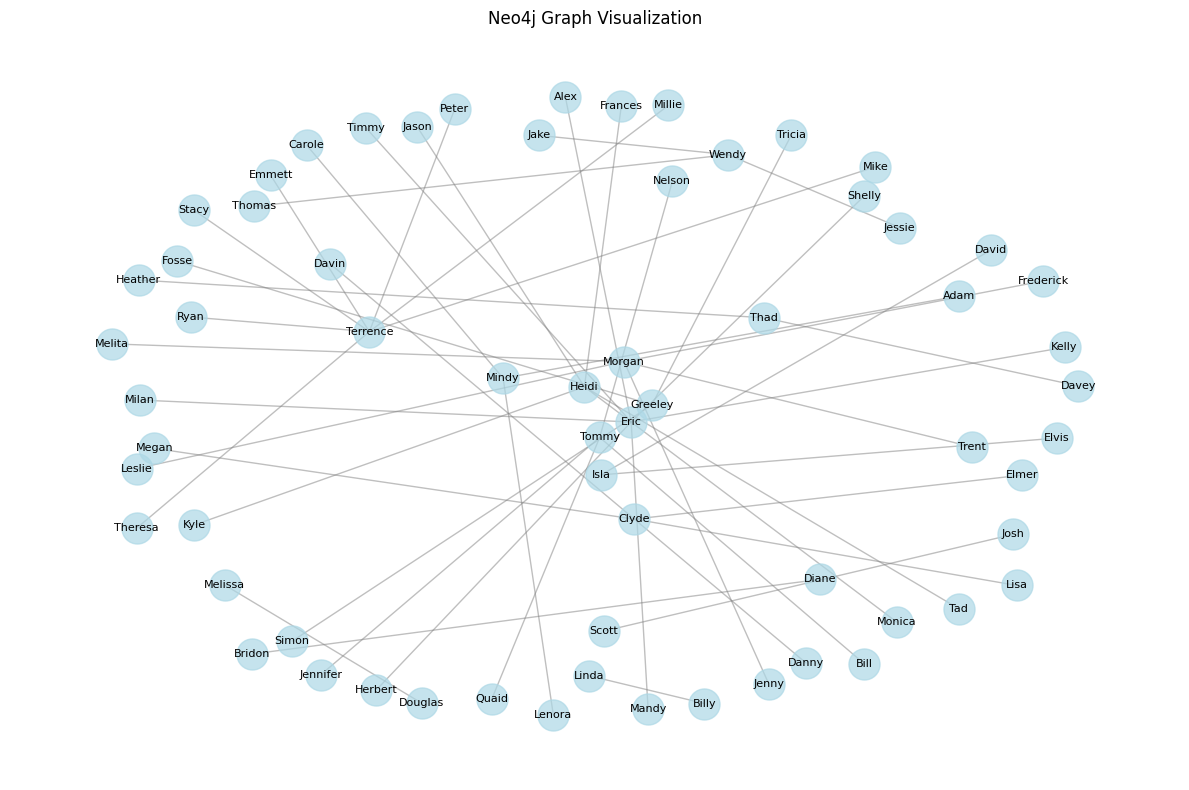

Graph has 65 nodes and 50 edges


In [27]:
# Alternative 1: Using matplotlib and networkx for visualization
import matplotlib.pyplot as plt
import networkx as nx

# Create a NetworkX graph from Neo4j results
G = nx.Graph()

# Add nodes and edges from the graph_data
for path in graph_data:
    nodes = path.nodes
    relationships = path.relationships
    
    # Add nodes with their properties
    for node in nodes:
        # Use node element_id as the node identifier
        node_id = node.element_id
        node_props = dict(node)
        node_props['labels'] = list(node.labels)
        G.add_node(node_id, **node_props)
    
    # Add edges with their properties
    for rel in relationships:
        start_id = rel.start_node.element_id
        end_id = rel.end_node.element_id
        rel_props = dict(rel)
        rel_props['type'] = rel.type
        G.add_edge(start_id, end_id, **rel_props)

# Create visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                       node_size=500, alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')

# Draw labels (using node names if available, otherwise IDs)
labels = {}
for node_id in G.nodes():
    node_data = G.nodes[node_id]
    if 'name' in node_data:
        labels[node_id] = node_data['name']
    else:
        labels[node_id] = str(node_id)[-8:]  # Last 8 chars of ID

nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Neo4j Graph Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

In [29]:
# Alternative 3: Simple text-based analysis
print("=== Graph Analysis ===")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Graph density: {nx.density(G):.3f}")

if G.number_of_nodes() > 0:
    print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    
    # Node degree distribution
    degrees = [G.degree(n) for n in G.nodes()]
    print(f"\nDegree distribution:")
    print(f"Min degree: {min(degrees)}")
    print(f"Max degree: {max(degrees)}")
    
    # Most connected nodes
    top_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]
    print(f"\nTop 5 most connected nodes:")
    for node_id, degree in top_nodes:
        print(f"  Node {node_id}: {degree} connections")

# Show first few nodes and their properties
print(f"\n=== Sample Nodes ===")
for i, (node_id, data) in enumerate(G.nodes(data=True)):
    if i >= 3:  # Show only first 3
        break
    print(f"Node {node_id}: {data}")

=== Graph Analysis ===
Total nodes: 65
Total edges: 50
Graph density: 0.024
Average degree: 1.54

Degree distribution:
Min degree: 1
Max degree: 7

Top 5 most connected nodes:
  Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:177: 7 connections
  Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:178: 7 connections
  Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:168: 5 connections
  Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:170: 5 connections
  Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:181: 5 connections

=== Sample Nodes ===
Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:0: {'informalCommunity': 0, 'formalCommunity': 116, 'hierarchyLevel': 3, 'x': 600, 'name': 'Bridon', 'y': 508.8579621897625, 'id': 'Bridon', 'labels': ['Employee']}
Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:167: {'informalCommunity': 77, 'formalCommunity': 116, 'hierarchyLevel': 2, 'x': 400, 'name': 'Diane', 'y': 366.8867097993172, 'id': 'Diane', 'labels': ['Employee']}
Node 4:0fef049f-b54a-4f8c-ae7c-4f02ef3ac353:1: {'informalC